# Titanic dataset - Binary classification

### Pycaret test

Mainly following the pycaret documentation [example](https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Binary%20Classification.ipynb)

The Titanic dataset present a binary classification problem, where the goal is to predict whether a passenger survived or not.   
In this notebook, I will build a simple Random Forest model to predict the survival of passengers.

Will import the data cleaned in the previous step, with the following features:

| Variable | Definition                          | Value                        |
|----------|-------------------------------------|----------------------------|
| survival | Survival                            | 0=No, 1=Yes            |
| pclass   | Ticket class                        | 1=1st, 2=2nd, 3=3rd  |
| sex      | Sex                                 | 0=Female, 1=Male                           |
| Age      | Age in years                        |                            |
| sibsp    | # of siblings / spouses aboard the Titanic |                    |
| parch    | # of parents / children aboard the Titanic |                    |
| fare     | Passenger fare                      |                            |
| cabin    | Cabin number                        | 0=NaN/Unidentified, 1=Yes/Valid Cabin nr                           |
| embarked | Port of Embarkation                 | 0=Cherbourg, 1=Queenstown, 2=Southampton |

In [58]:
%reload_ext watermark
%watermark

Last updated: 2024-05-28T18:09:01.444193+02:00

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.24.0

Compiler    : MSC v.1935 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 12
Architecture: 64bit



In [59]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret

pd.set_option('display.float_format', lambda x: '%.2f' % x)
%watermark -w
%watermark -iv

Watermark: 2.4.3

pandas    : 2.1.4
seaborn   : 0.13.2
matplotlib: 3.7.5
pycaret   : 3.3.2
numpy     : 1.26.4



## Load and inspect data

In [60]:
# load cleaned data
train_data = pd.read_csv('data/train_clean_allFeatures.csv')
test_data = pd.read_csv('data/test_clean_allFeatures.csv')

# print the shape of the data
print('Train dataset shape (rows, columns):', train_data.shape)
print('Test dataset shape (rows, columns):', test_data.shape)

train_data.head(3)

Train dataset shape (rows, columns): (891, 12)
Test dataset shape (rows, columns): (418, 11)


,PassengerId,Survived,Age,Fare,SibSp,Parch,Pclass_2,Pclass_3,Sex_1,Cabin_1,Embarked_1,Embarked_2
0,1,0,-0.58,-0.50,0.48,-0.44,False,True,True,False,False,True
1,2,1,0.66,0.73,0.48,-0.44,False,False,False,True,False,False
2,3,1,-0.27,-0.49,-0.48,-0.44,False,True,False,False,False,True


In [61]:
test_data.head(3)

,PassengerId,Age,Fare,SibSp,Parch,Pclass_2,Pclass_3,Sex_1,Cabin_1,Embarked_1,Embarked_2
0,892,0.39,-0.49,-0.48,-0.44,False,True,True,False,True,False
1,893,1.36,-0.51,0.48,-0.44,False,True,False,False,False,True
2,894,2.52,-0.46,-0.48,-0.44,True,False,True,False,True,False


## Pycaret setup

Will use the Pycaret library to quickly compare different models and tune hyperparameters.   
Pycaret is a low-code machine learning library that automates the machine learning workflow. It is an open-source project that is built on top of popular machine learning libraries, including scikit-learn, XGBoost, and LightGBM.

In [62]:
# import pycaret classification and init setup
from pycaret.classification import *

# setup the environment

# train_data minus column 'PassengerId'
train_data = train_data.drop(['PassengerId'], axis=1)
s = setup(data=train_data, target='Survived', session_id=123)

# s = setup(data=train_data, target='Survived', session_id=123, silent=True, 
#           train_size=0.8, normalize=True, transformation=True, fix_imbalance=True)

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 11)"
4,Transformed data shape,"(891, 11)"
5,Transformed train set shape,"(623, 11)"
6,Transformed test set shape,"(268, 11)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [63]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [64]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [65]:
# init setup on exp
exp.setup(data=train_data, target='Survived', session_id=123)

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 11)"
4,Transformed data shape,"(891, 11)"
5,Transformed train set shape,"(623, 11)"
6,Transformed test set shape,"(268, 11)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


## Compare models
This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using ``add_metric`` and ``remove_metric`` function.

In [66]:
# compare baseline models
best = compare_models()

In [67]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8250,0.8461,0.7236,0.8003,0.7573,0.6216,0.6258,0.0380
lightgbm,Light Gradient Boosting Machine,0.8202,0.8441,0.7402,0.7833,0.7571,0.6150,0.6194,0.1270
rf,Random Forest Classifier,0.8186,0.8427,0.7402,0.7774,0.7568,0.6124,0.6144,0.0570
ada,Ada Boost Classifier,0.8089,0.8397,0.7616,0.7472,0.7523,0.5970,0.5993,0.0280
lr,Logistic Regression,0.8088,0.8590,0.7239,0.7665,0.7408,0.5903,0.5942,0.0200
ridge,Ridge Classifier,0.8040,0.8573,0.7114,0.7621,0.7329,0.5790,0.5823,0.0080
xgboost,Extreme Gradient Boosting,0.8026,0.8356,0.7194,0.7541,0.7325,0.5769,0.5806,0.0320
lda,Linear Discriminant Analysis,0.8024,0.8574,0.7114,0.7580,0.7311,0.5758,0.5788,0.0080
et,Extra Trees Classifier,0.7912,0.8312,0.7192,0.7344,0.7251,0.5569,0.5585,0.0510
knn,K Neighbors Classifier,0.7863,0.8253,0.6982,0.7391,0.7123,0.5432,0.5493,0.0160


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Analyze model

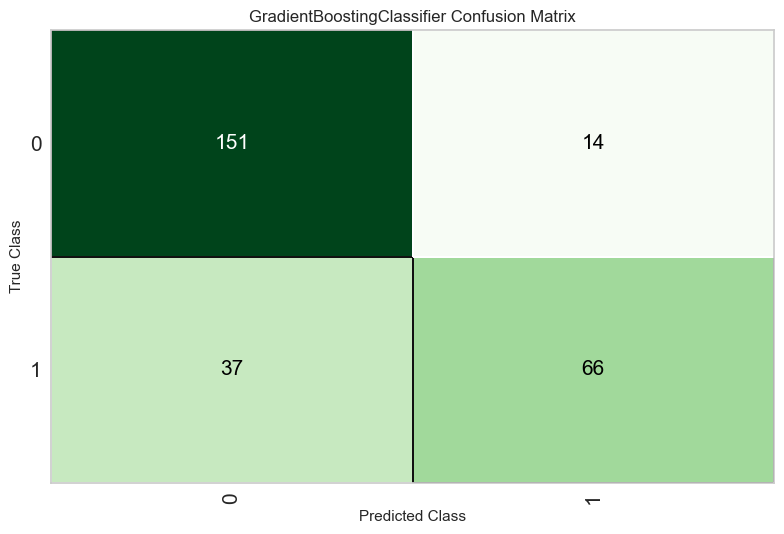

In [68]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

``pycaret.classification.plot_model()``  
See more available plot options from [documentation](https://pycaret.readthedocs.io/en/stable/api/classification.html#pycaret.classification.plot_model)   
E.g. `pipeline`, `auc`, `confusion_matrix`, `parameter`, `pr`, `threshold`,  `boundary`

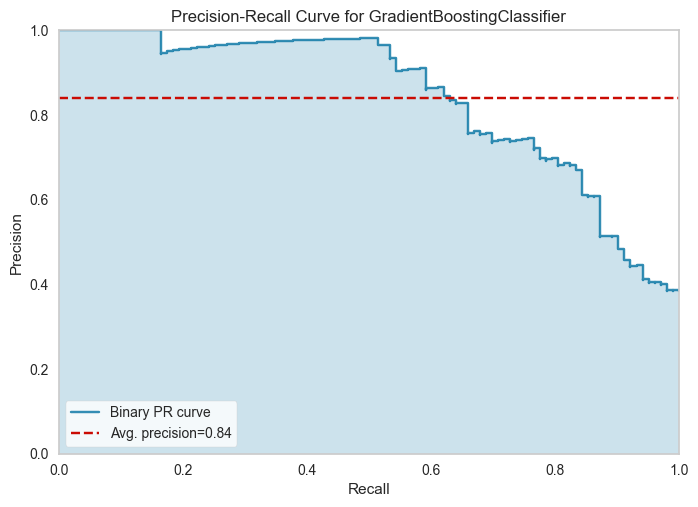

In [69]:
# plot AUC
plot_model(best, plot = 'pr')

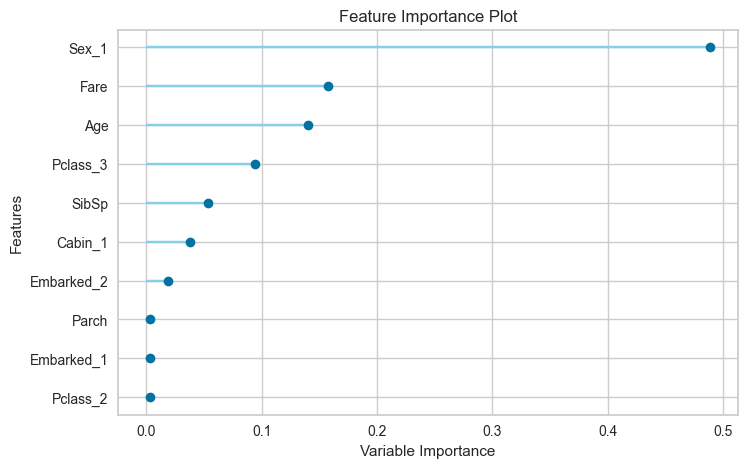

In [70]:
# plot feature importance
plot_model(best, plot = 'feature')

In [71]:
# check docstring to see available plots 
# help(plot_model)

An alternate to plot_model function is ``evaluate_model``. It is interactive with many plots, BUT can only be used in Notebook since it uses ipywidget.

In [75]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [76]:
# use automl function to tune hyperparameters
tuned_best = automl(optimize = 'AUC')
